In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/")
trX, trY, teX, teY=mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
class SparseAutoEncoder(object):
    def __init__(self, m, n, eta=0.01):
        #m : Number of neurons in input/ output layer
        #n : number of neurons in hidden layer
        
        self._m=m
        self._n=n
        self.learning_rate = eta
        
        # Create the Computation Graph
        
        #weights= and biases
        self._w1=tf.Variable(tf.random_normal(shape=(self._m, self._n)))
        self._w2=tf.Variable(tf.random_normal(shape=(self._n, self._m)))
        self._b1=tf.Variable(np.zeros(self._n).astype(np.float32))     #bias for hidden layer
        self._b2=tf.Variable(np.zeros(self._m).astype(np.float32))     #bias for output layer
        
        #placeholder for inputs
        self._X=tf.placeholder(tf.float32, [None, self._m])
        
        self.y=self.encoder(self._X)
        self.r=self.decoder(self.y)
        error=self._X - self.r
        
        self._loss=tf.reduce_mean(tf.pow(error, 2))
        alpha=7.5e-5
        kl_div_loss=tf.reduce_sum(self.kl_div(0.02, tf.reduce_mean(self.y,  0)))
        loss=self._loss + alpha + kl_div_loss
        self._opt=tf.train.AdamOptimizer(self.learning_rate).minimize(self._loss)
        
    def encoder(self, x):
        h=tf.matmul(x, self._w1) + self._b1
        return tf.nn.sigmoid(h)


    def decoder(self, x):
        h = tf.matmul(x, self._w2) + self._b2
        return tf.nn.sigmoid(h)
    def set_session(self, session):
        self.session= session

    def reduced_dimension(self, x):
        h= self.encoder(x)
        return self.session.run(h, feed_dict={self._X: x})

    def reconstruct(self, x):
        h=self.encoder(x)
        r=self.decoder(h)
        return self.session.run(r, feed_dict={self._X: x})

    def kl_div(self, rho, rho_hat):
        term2_num= tf.constant(1.) - rho
        term2_den= tf.constant(1.) - rho_hat
        kl=self.logfunc(rho, rho_hat) + self.logfunc(term2_num, term2_den)
        return kl

    def logfunc(self, x1, x2):
        return tf.multiply(x1, tf.log(tf.div(x1, x2)))

    def fit(self, X, epochs = 10, batch_size=100):
        N, D= X.shape

        num_batches= N//batch_size

        obj=[]
        for i in range(epochs):
            #X= shuffle(X)

            for j in range(num_batches):
                batch = X[j*batch_size : (j*batch_size + batch_size)]
                _, ob=self.session.run([self._opt, self._loss], feed_dict={self._X: batch})

            if j %100 ==0:
                print('training epoch {0} batch {2} cost {1}'. format(i, ob, j))
                obj.append(obj)
                return obj


In [9]:
Xtrain= trX.astype(np.float32)
Xtest= teX.astype(np.float32)
_, m = Xtrain.shape

sae= SparseAutoEncoder(m , 256)

#Initialise all variables

init= tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    sae.set_session(sess)
    err=sae.fit(Xtrain, epochs=10)
    out=sae.reconstruct(Xtest[0:100])
    
    

ValueError: x, y, and format string must not be None

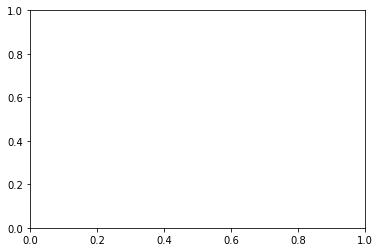

In [10]:
plt.plot(err)
plt.xlabel('epochs')
plt.ylabel('Reconstruction loss (MSE)')
